# **Previsão de preços de carros usados usando modelos de regressão**

In [213]:
#Libs 
import pandas as pd 
import numpy as np 

#Regressão Linear, Random Forest, Decision Tree, Ada Boost, Gradient Boost
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Padronização 
from sklearn.preprocessing import LabelEncoder

#Metrics 
from sklearn.metrics import mean_squared_error, r2_score

#Visualização 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Business Understanding

Uma empres automobilística pretende expandir suas operações para o mercado dos Estados Unidos, estabelecendo uma unidade de fabricação local e produzindo veículos diretamente no país. O objetivo estratégico é competir com as montadoras americanas e europeias no mercado automotivo dos EUA.

Para isso, ela contratou uma empresa de consultoria especializada no setor automotivo para analisar os fatores que influenciam os preços dos automóveis no mercado americano. Essa análise é crucial, uma vez que os determinantes de preço no mercado dos EUA podem diferir significativamente daqueles do mercado o qual está inserido.

A empresa deseja compreender:

- **Quais variáveis são determinantes para a previsão do preço de um automóvel.**
- **A relevância e impacto dessas variáveis na precificação.**

Com base em extensivas pesquisas de mercado, a consultoria compilou um robusto conjunto de dados que abrange diversos modelos de carros disponíveis no mercado americano.

---

### Objetivo

Fornecer à empresa automobilística uma análise baseada em dados que identifique as principais variáveis que influenciam o preço dos carros no seu mercado. Essa análise servirá para:

1. **Apoiar a tomada de decisões estratégicas** sobre a entrada no mercado.
2. **Definir características competitivas dos produtos** que atendam às expectativas do público-alvo local.
3. **Estabelecer estratégias de precificação** adequadas.
4. **Posicionar a marca de forma competitiva** no mercado automotivo a qual esta inserido. 

O objetivo final é garantir que a referida empresa tome decisões informadas e maximize suas chances de sucesso no  seu mercado .



# Data Understanding

In [214]:
#Import data 
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


car_ID - ID exclusivo para cada observação.

symboling - Classificação de risco de seguro atribuída. +3 indica alto risco, -3 é seguro.

carCompany - Nome da empresa automobilística.

fueltype - Tipo de combustível do carro.

aspiração - Tipo de sistema de aspiração utilizado no automóvel.

doornumber - Número de portas do carro.

carbody - Tipo de carroceria do carro.

drivewheel - Tipo de roda motriz.

enginelocation - Localização do motor do carro.

wheelbase - Distância entre eixos do carro.

carlenght -  Comprimento do carro.

carwidth - Largura do carro.

carheight - Altura do carro.

curbweight - Peso do carro sem ocupantes ou bagagem.

enginetype - Tipo de motor do carro.

cylindernumber - Número de cilindros no motor do carro.

enginesize - Tamanho do motor do carro.

fuelsystem - Sistema de combustível usado no carro.

boreratio - Relação do diâmetro do motor do carro.

stroke - Curso ou volume dentro do motor.

cpompressionratio - Taxa de compressão do motor do carro.

horsepower - Potência do carro.

peakrpm - Rotações máximas do carro por minuto.

citympg - Quilometragem na cidade.

highwaympg - Quilometragem na rodovia.

price - Variável dependente – Preço do carro.

In [215]:
#Dimensão de dados 
df.shape

#Infos gerais 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [216]:
#Verifincando nulos 
df.isnull().sum()


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [217]:
#Verificando valores unicos em 'doornumber'
df['doornumber'].value_counts();

#Convertendo valores para int 
df['doornumber'].replace({'four': 4, 'two' : 2}, inplace= True);

In [218]:
#Valores unicos em 'cylindernumber'
df['cylindernumber'].unique();

#Convertendo valores para int 
df['cylindernumber'].replace({'four' : 4, 'six' : 6, 'five' : 5, 'three' : 3, 'twelve' : 12, 'two' : 2, 'eight' : 8}, inplace= True);

Verificando colunas numéricas

In [219]:
df.select_dtypes(include=['number']).columns

Index(['car_ID', 'symboling', 'doornumber', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price'],
      dtype='object')

Verificando colunas categóricas

In [220]:
df.select_dtypes(include=['object']).columns

Index(['CarName', 'fueltype', 'aspiration', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'fuelsystem'],
      dtype='object')

In [221]:
#Infos estatísticas invertendo colunas 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
doornumber,205.0,3.121951,0.994966,2.00,2.00,4.00,4.00,4.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
cylindernumber,205.0,4.380488,1.080854,2.00,4.00,4.00,4.00,12.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00


In [222]:
#Valores unicos em CarName 
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

**Análise**:
- Após analisarmos valores únicos, podemos ver que os nomes dos carros se tratam da 'marca' + o 'modelo' do carro.;
- Para podermos analisaramos melhor, iremos dividir esses valores em duas colunas separadas: marca e modelo;


## Data Cleaning

In [223]:
#Dividindo valores da coluna 'CarName' em novas coluna 
df[['company','model']] = df['CarName'].str.split(n=1, expand= True)  

#Excluindo a coluna 'CarName'
df.drop(columns= ['CarName'], inplace= True)


Código explicado: 
- **.split** aplicado a uma str, separa os elementos, por padrao um espaço; 
- **n=1** divide apenas uma vez, ou seja, em duas partes, dividindo apenas no primeiro espaço encontrado;
- **expand** transforma o resultado da divisão em duas novas colunas no df. 

In [224]:
#Analisando como ficou
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company,model
0,1,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,gas,std,2,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,gas,std,4,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,gas,std,4,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [225]:
#Verificando valores unicos na coluna 'company'
df['company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

- Podemos ver que existem valores que variam em questão de sintaxe, no caso das montadoras;
- Para isso iremos corrigir os nomes incorretos ou com sintaxe diferente dos demais dados. 

In [226]:
#Dicioário de correções 
corrections = {'Nissan': 'nissan',
               'vokswagen':'volkswagen',
               'vw':'volkswagen',
               'toyouta' : 'toyota',
               'porcshce' : 'porshe',
               'maxda' : 'mazda'
               }

#Usando replace p/ substituir 
df['company'] = df['company'].replace(corrections)

df

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company,model
0,1,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,gas,std,2,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,gas,std,4,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,gas,std,4,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,4,sedan,rwd,front,109.1,188.8,...,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo,145e (sw)
201,202,-1,gas,turbo,4,sedan,rwd,front,109.1,188.8,...,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo,144ea
202,203,-1,gas,std,4,sedan,rwd,front,109.1,188.8,...,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo,244dl
203,204,-1,diesel,turbo,4,sedan,rwd,front,109.1,188.8,...,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo,246


In [227]:
#Verificando dados duplicados
df.duplicated().sum()

np.int64(0)

## Explorando análises em geral

#Distribuição dos preços dos carros

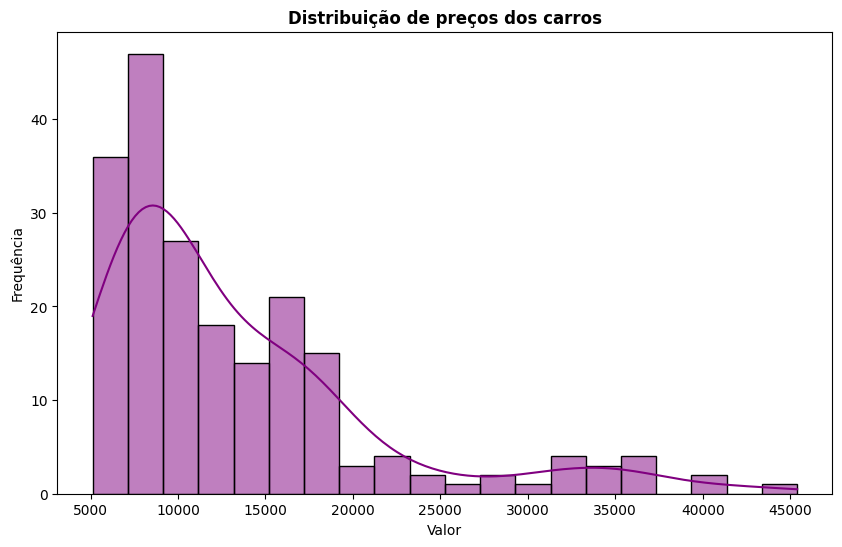

In [228]:
#Histograma com 20 intervalos(barras)
plt.figure(figsize=(10,6))
sns.histplot(df['price'], kde= True, bins= 20, color= 'purple')

#Conf titulos e eixos 
plt.title('Distribuição de preços dos carros', fontweight= 'bold')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.show()

#Top 10 companias com  média de preços mais altos

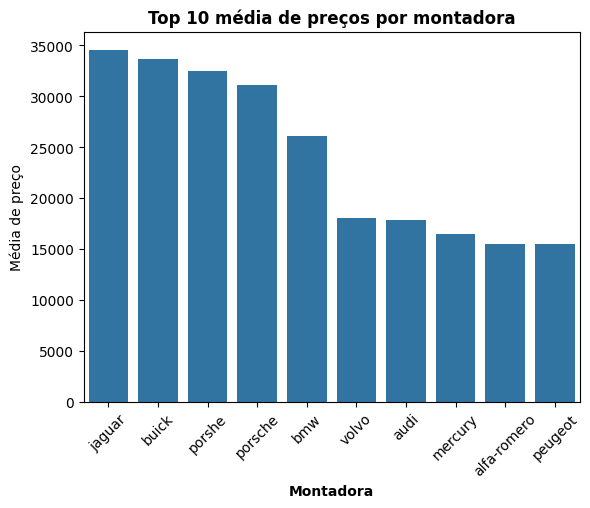

In [229]:
#Top 10 companias com  média de preços mais altos 
topcompany = df.groupby('company')['price'].mean().sort_values(ascending=False).head(10)

#Gráfico 
sns.barplot(topcompany)

#Conf titulo e eixo e rotação
plt.title('Top 10 média de preços por montadora', fontweight = 'bold')
plt.xlabel('Montadora', fontweight = 'bold')
plt.ylabel('Média de preço')
plt.xticks(rotation = 45)
plt.show()


#Distribuição de tipo de carro (carbody)

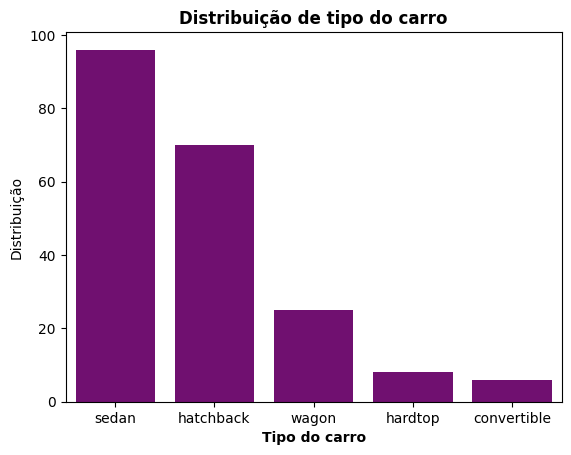

In [230]:
#Distribuição de tipo do carro (carbody)
typecar = df.groupby('carbody')['car_ID'].count().sort_values(ascending= False)

#Grafico
sns.barplot(typecar, color= 'purple')

#Conf titulo e eixos 
plt.title('Distribuição de tipo do carro', fontweight = 'bold')
plt.xlabel('Tipo do carro', fontweight = 'bold')
plt.ylabel('Distribuição')
plt.show()


**Outliers**

- Vamos analisar possíveis outliers em nossa variável target 'Price'.

In [231]:
#Verificando média e std (devio padrão) de 'price'
media = np.mean(df['price'])
std = np.std(df['price'])

print('Média:', media)
print('Desvio padrão:', std)


Média: 13276.710570731706
Desvio padrão: 7969.34350572002


<Axes: ylabel='price'>

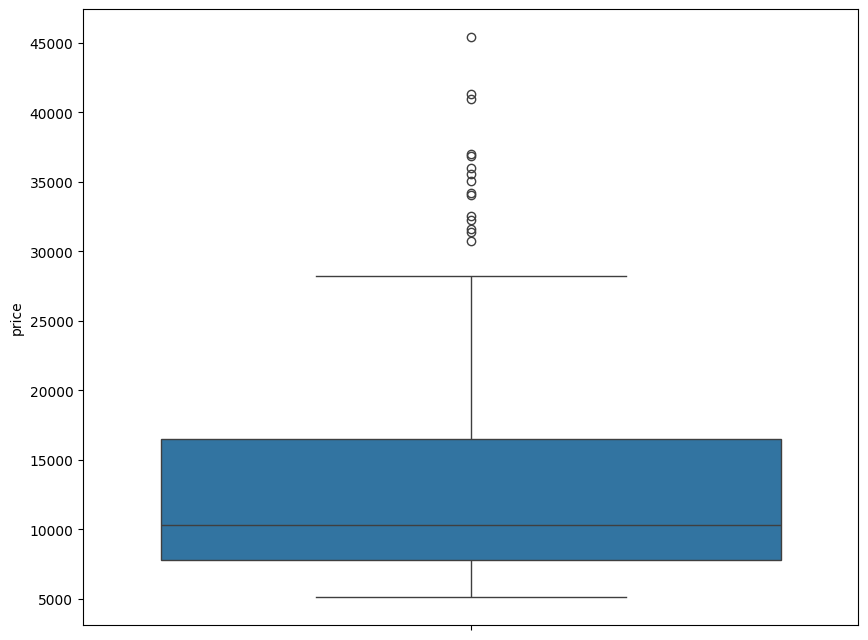

In [232]:
#Verificando outliers da nossa target 
fig = plt.figure(figsize=(10,8))
sns.boxplot(data= df, y= df.price)


In [233]:
df['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

**Análise**:
- Existem valores muito acima da nossa média na nossa variável target, que se tratam de carros de luxo.
- Esses dados na teoria são normais, porém para nossa etapa de modelagem irão atrapalhar nas nossas predições,
para isso iremos tratar os mesmos posteriormente.


In [234]:
df.dtypes

car_ID                int64
symboling             int64
fueltype             object
aspiration           object
doornumber            int64
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber        int64
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
company              object
model                object
dtype: object

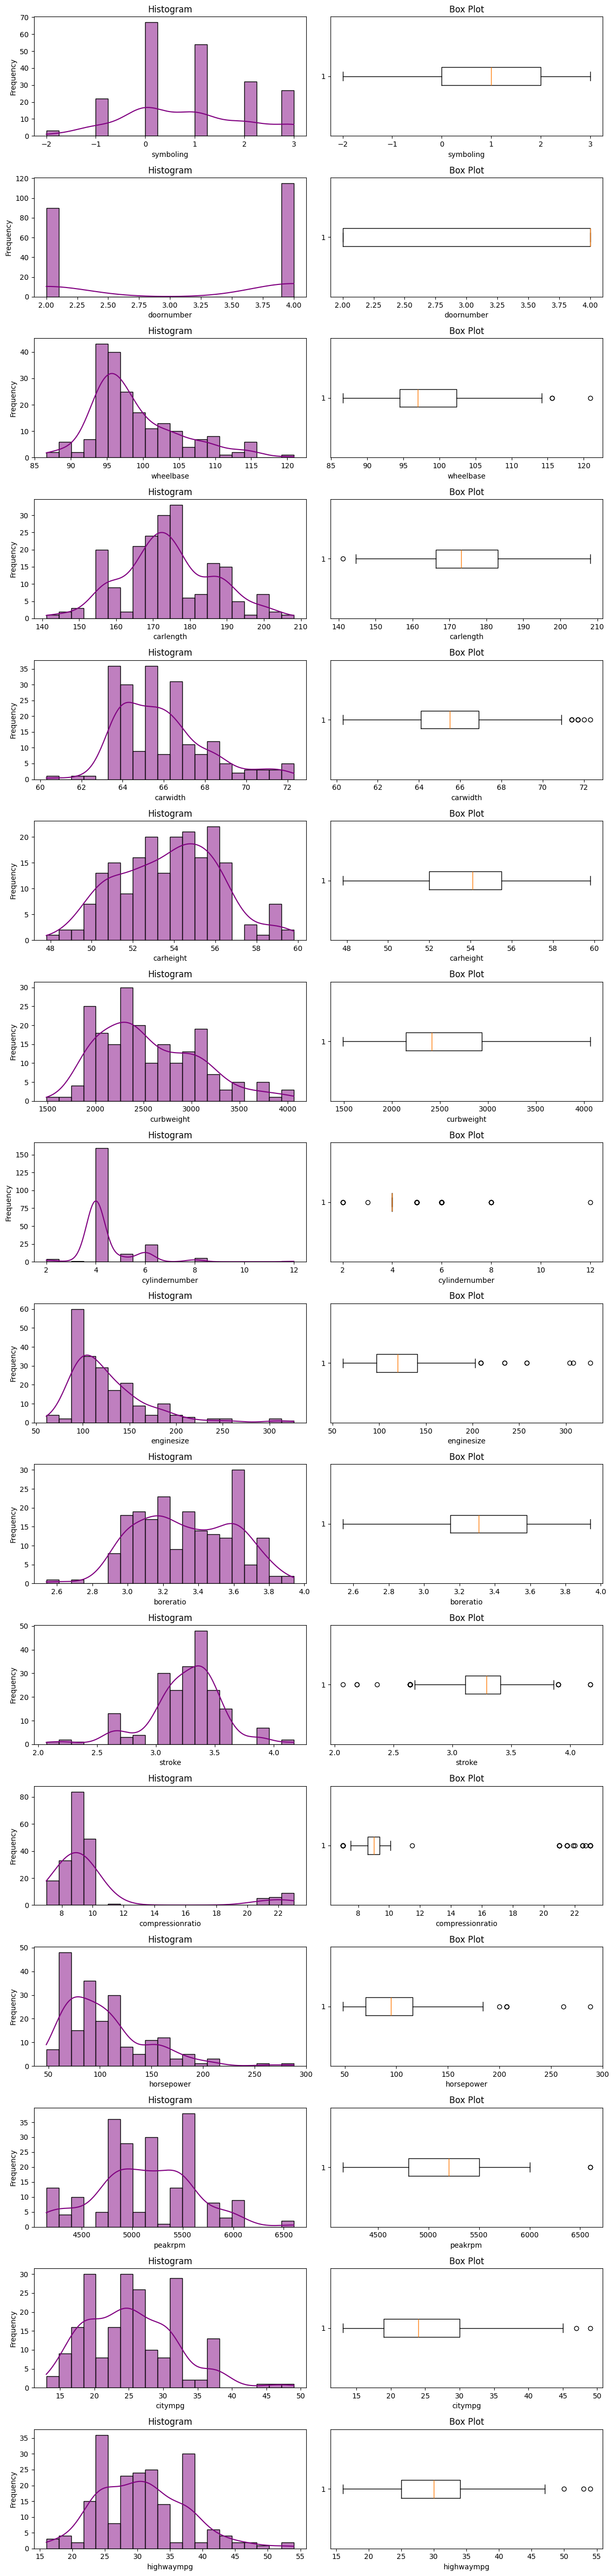

In [235]:
#Selecionando colunas numéricas
num_cols = ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                     'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                     'peakrpm', 'citympg', 'highwaympg']

#Criando os subplots
fig, axes = plt.subplots(nrows=len(num_cols), ncols=2, figsize=(12, 50))
fig.subplots_adjust(hspace=0.5)

#Criando histogramas e box plots
for i, column in enumerate(num_cols):
    #Histograma
    sns.histplot(data=df, x=column, bins=20, color='purple',kde=True, ax=axes[i,0])
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Frequency')
    axes[i, 0].set_title('Histogram')

    #Box plot
    axes[i, 1].boxplot(df[column], vert=False)
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_title('Box Plot')

#Mostrando os gráficos
plt.tight_layout()
plt.show()

## Análises visuais de colunas categoricas

<function matplotlib.pyplot.show(close=None, block=None)>

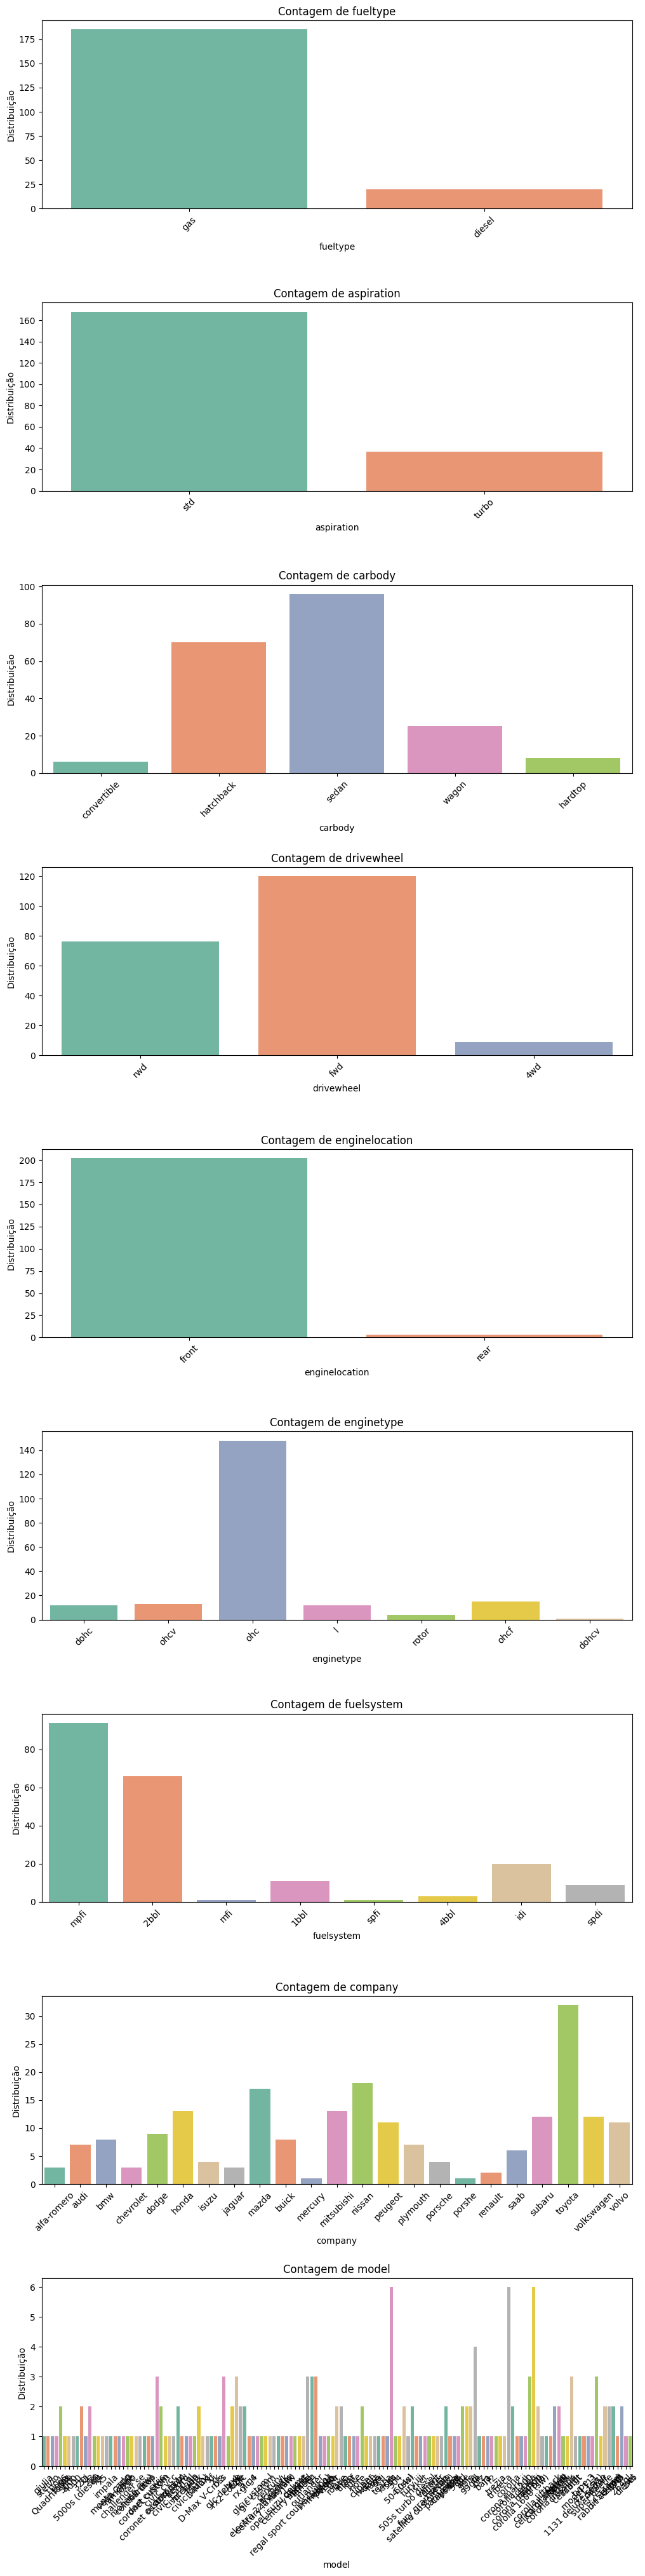

In [236]:
#Suprimindo avisos de output
import warnings
warnings.filterwarnings("ignore")

#Selecionando variáveis categoricas 
cat_cols = df.select_dtypes(include=['object']).columns

#Cofigurando imagem e subplots 
fig, axes = plt.subplots( nrows=len(cat_cols), ncols=1, figsize =(12,50));
fig.subplots_adjust(hspace=0.5);

#Criando grafico de barras
for i, column in enumerate(cat_cols):
           sns.countplot(x=column, data=df, ax=axes[i], palette= 'Set2')
           axes[i].set_xlabel(column);
           axes[i].set_ylabel('Distribuição');
           axes[i].set_title('Contagem de ' + column)
           axes[i].tick_params(axis = 'x', rotation = 45)
    
    
#Ajustando layout 
plt.tight_layout

#Plotando
plt.show



## Correlação entre Preço e colunas numéricas

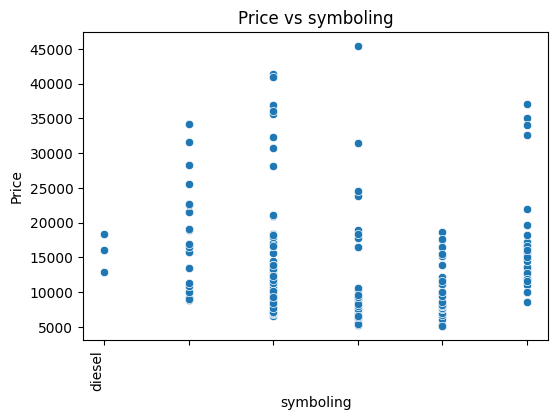

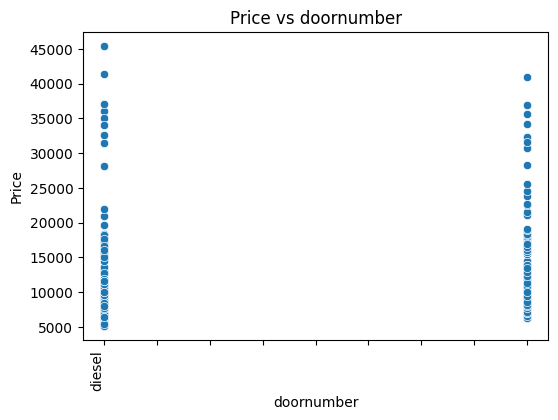

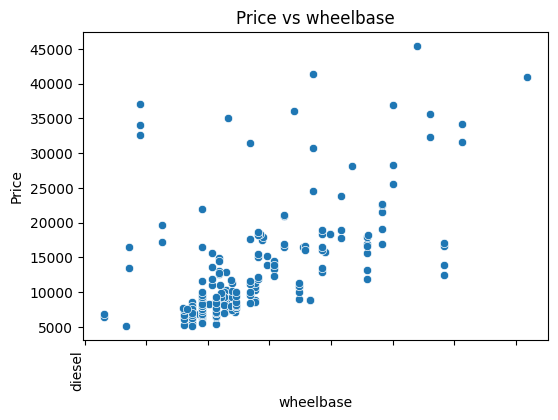

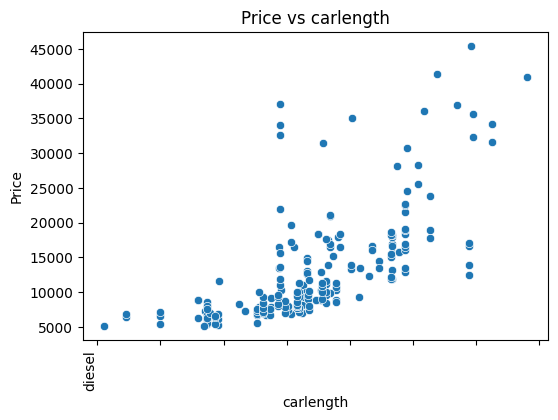

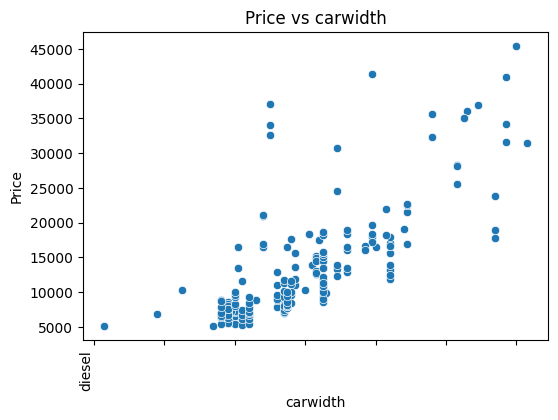

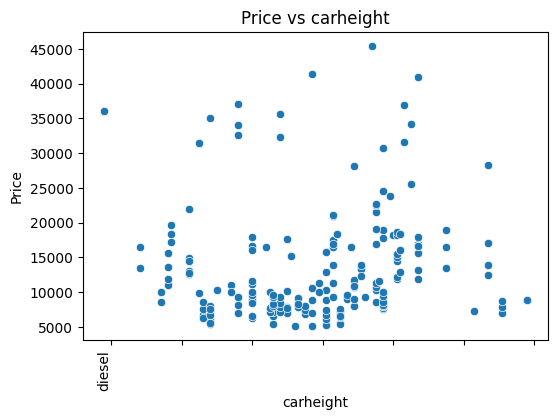

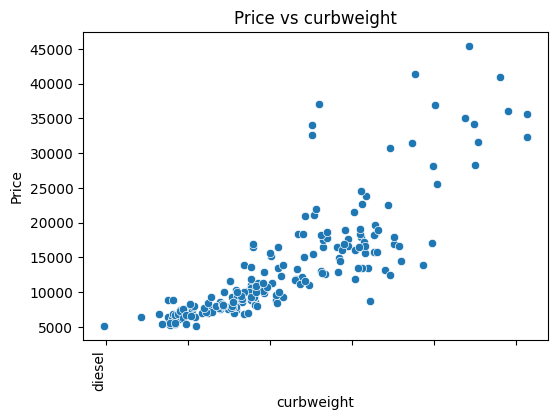

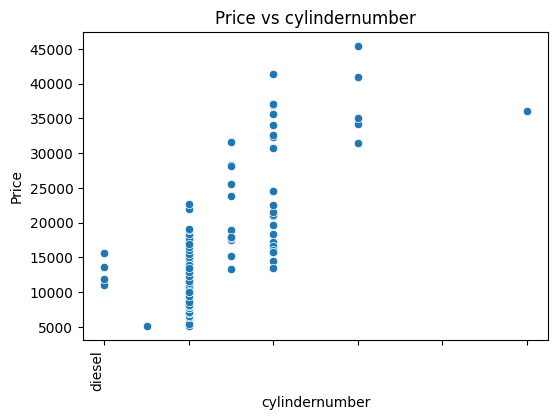

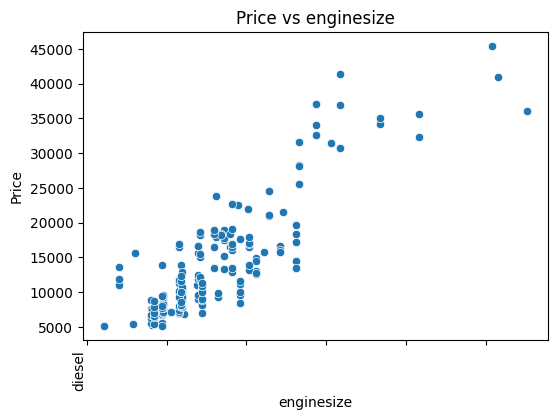

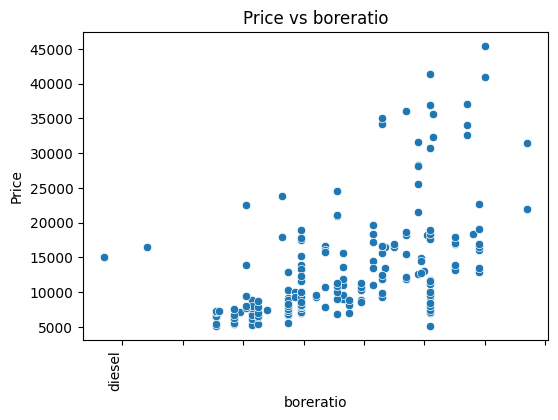

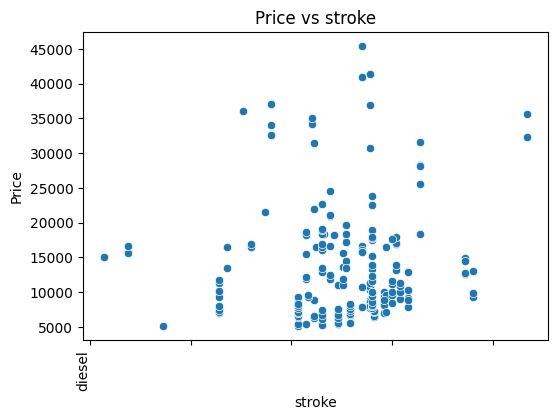

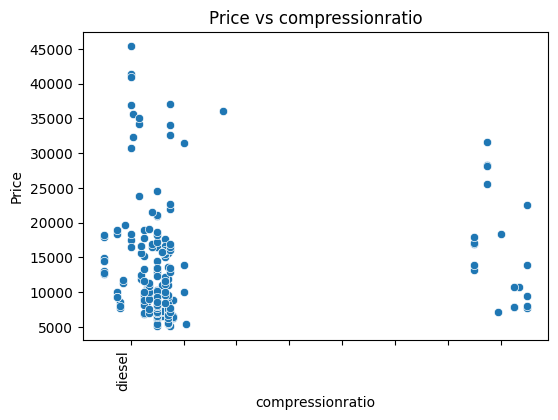

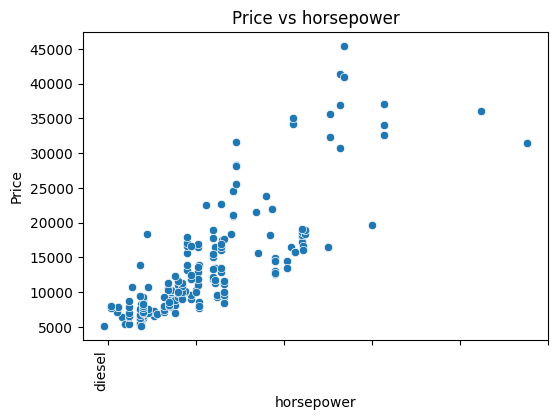

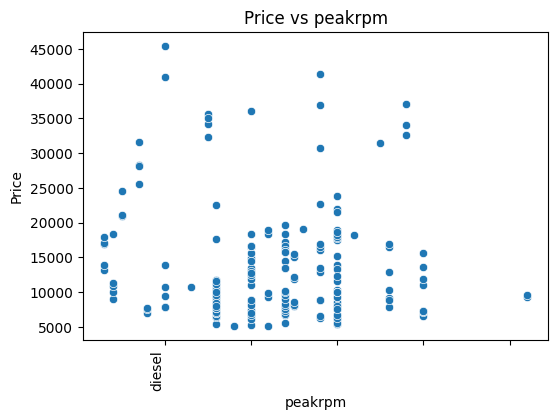

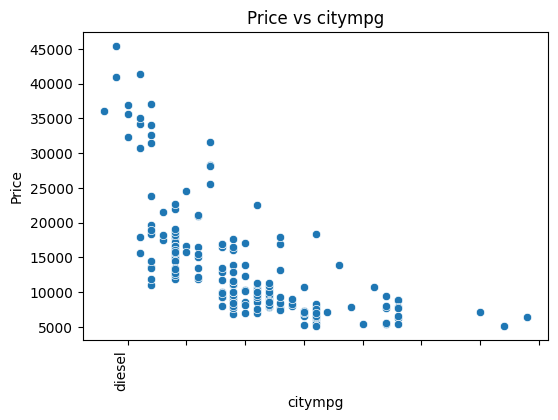

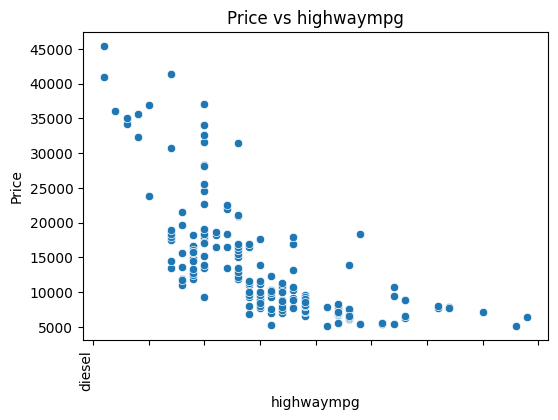

In [237]:
for column in num_cols:
    # Create subplots
    fig, ax = plt.subplots(figsize=(6, 4))

    # Scatter plot using seaborn
    sns.scatterplot(x=df[column], y=df['price'], ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Price')
    ax.set_title('Price vs ' + column)
    ax.set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')
   

**Correlação com Scipy**

In [238]:
#Importando lib
from scipy.stats import pearsonr

#Correlação
for column in num_cols:
    correlation, p_value= pearsonr(df['price'], df[column])
    print("Correlação de'price' com coluna '{}' : {:.4f}".format(column, correlation))
    print("p-value for column '{}' {:.4f}".format(column, p_value))
    

Correlação de'price' com coluna 'symboling' : -0.0800
p-value for column 'symboling' 0.2543
Correlação de'price' com coluna 'doornumber' : 0.0318
p-value for column 'doornumber' 0.6504
Correlação de'price' com coluna 'wheelbase' : 0.5778
p-value for column 'wheelbase' 0.0000
Correlação de'price' com coluna 'carlength' : 0.6829
p-value for column 'carlength' 0.0000
Correlação de'price' com coluna 'carwidth' : 0.7593
p-value for column 'carwidth' 0.0000
Correlação de'price' com coluna 'carheight' : 0.1193
p-value for column 'carheight' 0.0883
Correlação de'price' com coluna 'curbweight' : 0.8353
p-value for column 'curbweight' 0.0000
Correlação de'price' com coluna 'cylindernumber' : 0.7183
p-value for column 'cylindernumber' 0.0000
Correlação de'price' com coluna 'enginesize' : 0.8741
p-value for column 'enginesize' 0.0000
Correlação de'price' com coluna 'boreratio' : 0.5532
p-value for column 'boreratio' 0.0000
Correlação de'price' com coluna 'stroke' : 0.0794
p-value for column 'strok

## Insights

Após fazermos análises de correlações e p-values da nossa variável target 'Price' com as colunas numéricas, podemos inferir que:

- Correlações fortes: 

As variáveis 'curbweight', 'enginesize', 'horsepower', 'carwidth' e 'cylindernumber' 
têm fortes correlações positivas com 'price'. Isso sugere que, à medida que esses atributos aumentam, o preço do carro tende a aumentar significativamente.

- Correlações moderadas:

As variáveis 'wheelbase', 'carlenght' e 'boreratio' 
As variáveis 'curbweight', 'enginesize', 'horsepower', 'carwidth', 'wheelbase' e 'cylindernumber' têm fortes correlações positivas com 'price'. 
Isso sugere que, à medida que esses atributos aumentam, o preço do carro tende a aumentar significativamente.

- Correlações fracas:

As variáveis 'carheight', 'stroke', 'compressionratio' e 'symboling' apresentam correlações positivas fracas com 'price'. 
Essas variáveis podem ter uma influência limitada no preço em comparação com outras variáveis.

- Correlações negativas:

As variáveis  'citympg' e 'highwaympg' têm fortes correlações negativas com 'price'. 
Isso indica que, à medida que a eficiência de combustível do carro (medida em milhas por galão) aumenta, o preço tende a diminuir.
Também podemos colocar que a variável 'doornumber' tem uma correlação negativa moderada, o que sugere que carros com mais portar podem ter um preço ligeiramente mais alto.

**P-values**

- Valores-p

Variáveis 'doornumber', 'symboling', 'stroke' e 'compressionratio' possuem p-values relativamente altos, o que sugere que não implicam muito importancia no preço do carro.


As demais variáveis estão igual ou muito próximas a 0, o que indicam que são estatisticamente significativas para a prediçaõ dos preços.

## Correlação entre Preço e colunas categoricas

In [239]:
#Verificando colunas categoricas
cat_cols

#Excluindo 'company' e 'mode'
cat_cols = cat_cols.drop(['company','model'])

In [240]:
cat_cols

Index(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'fuelsystem'],
      dtype='object')

**Correlação com ANOVA**

In [241]:
#Lib 
import statsmodels as sm 
import statsmodels.formula.api as ols 
from statsmodels.stats.anova import anova_lm


for column in cat_cols:
    #Criando o modelo ols
    model = ols.ols(f'price ~ C({column})', data=df).fit()
    #Mostrando o resultado
    anova_table = anova_lm(model, typ=2)  # Agora deve funcionar corretamente
    print(f"ANOVA results for {column} with 'price':")
    print(anova_table)
    print("\n")
    
    

ANOVA results for fueltype with 'price':
                   sum_sq     df         F    PR(>F)
C(fueltype)  1.454053e+08    1.0  2.292741  0.131536
Residual     1.287423e+10  203.0       NaN       NaN


ANOVA results for aspiration with 'price':
                     sum_sq     df         F  PR(>F)
C(aspiration)  4.121724e+08    1.0  6.636622  0.0107
Residual       1.260747e+10  203.0       NaN     NaN


ANOVA results for carbody with 'price':
                  sum_sq     df         F    PR(>F)
C(carbody)  1.801997e+09    4.0  8.031976  0.000005
Residual    1.121764e+10  200.0       NaN       NaN


ANOVA results for drivewheel with 'price':
                     sum_sq     df          F        PR(>F)
C(drivewheel)  5.344065e+09    2.0  70.320553  6.632887e-24
Residual       7.675574e+09  202.0        NaN           NaN


ANOVA results for enginelocation with 'price':
                         sum_sq     df         F    PR(>F)
C(enginelocation)  1.374973e+09    1.0  23.96974  0.000002
Residu

**Análises**

- **fueltype vs price**

F: 2.29, um valor baixo, indicando uma baixa variação explicada por fueltype.

PR(>F): 0.1315, o valor-p é maior que 0.05, indicando que fueltype não é estatisticamente significativo para explicar price.

- **aspiration vs price**

F: 6.64, um valor moderado, indicando alguma variação explicada por aspiration.

PR(>F): 0.0107, menor que 0.05, sugerindo que aspiration tem um efeito estatisticamente significativo sobre price.

- **carbody com price**

F: 8.03, um valor relativamente alto.

PR(>F): 0.000005, um valor-p muito baixo, sugerindo que carbody é altamente significativo para explicar price.

- **drivewheel vs price**


F: 70.32, um valor bastante alto, indicando que drivewheel explica grande parte da variação em price.

PR(>F): 6.63e-24, um valor-p extremamente baixo, indicando uma correlação muito significativa entre drivewheel e price.

- **enginelocation vs price**

F: 23.97, um valor alto, sugerindo uma forte relação entre enginelocation e price.

PR(>F): 0.000002, muito baixo, indicando que enginelocation é estatisticamente significativo para explicar price.

- **enginetype vs price**

F: 9.38, relativamente alto, sugerindo que enginetype explica parte da variação em price.

PR(>F): 4.69e-09, muito baixo, indicando uma relação estatisticamente significativa entre enginetype e price.

- **fuelsystem vs price**

F: 15.64, um valor elevado.

PR(>F): 2.99e-16, muito baixo, indicando que fuelsystem é estatisticamente significativo para explicar price.


**Resumo**

Esses resultados indicam que, para a maioria das variáveis categóricas, há diferenças significativas nas médias de price entre as diferentes categorias. 

Isso sugere que essas variáveis categóricas podem ser potencialmente úteis para prever o preço dos carros.
 
No entanto, no caso de "Tipo de Combustível," (fueltype) o valor-p está próximo ao nível de significância, indicando que a diferença nas médias pode não ser estatisticamente significativa para essa variável.





In [242]:
#Dropando colunas não significativas para o modelo 
cols_drop = ['car_ID', 'symboling', 'doornumber','stroke', 'compressionratio','fueltype']

#Definindo meu df sem as colunas 
df = df.drop(cols_drop, axis = 1)


Tratando outliers de 'price'

In [243]:
df['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

<Axes: ylabel='price'>

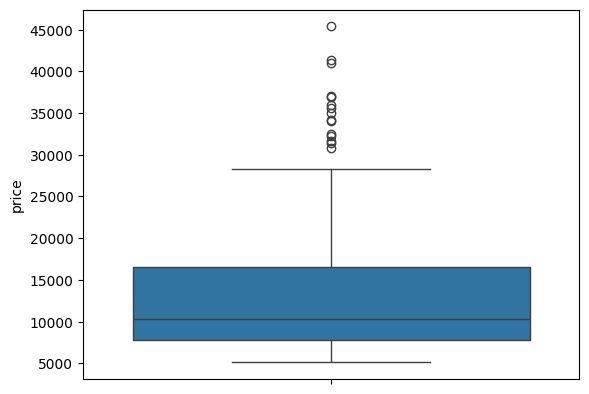

In [244]:
sns.boxplot(df['price'])

IQR 
- Vamos aplicar o método IQR para tratar os outliers 


In [245]:
#Definindo o IQR (Q3 - Q1)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

#Definindo os limites 
lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR

#Aplicando na minha coluna target
df['price'] = df['price'].clip(lower= lower_bound, upper= upper_bound)
 


<Axes: ylabel='price'>

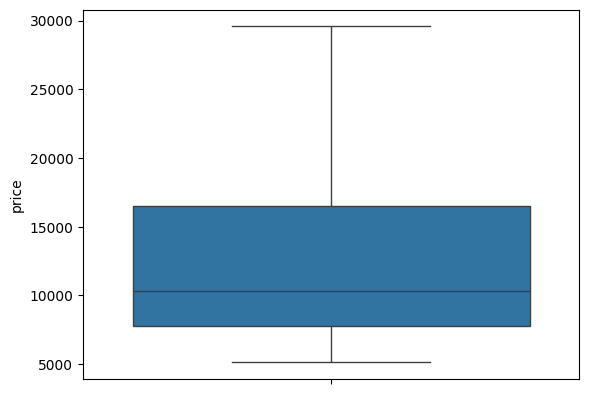

In [246]:
#Verificando o tratamento
sns.boxplot(df['price'])

In [247]:
#Verificando como ficou o df
df.head()

,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,...,enginesize,fuelsystem,boreratio,horsepower,peakrpm,citympg,highwaympg,price,company,model
0,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,...,130,mpfi,3.47,111,5000,21,27,13495.0,alfa-romero,giulia
1,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,...,130,mpfi,3.47,111,5000,21,27,16500.0,alfa-romero,stelvio
2,std,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,...,152,mpfi,2.68,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,std,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,...,109,mpfi,3.19,102,5500,24,30,13950.0,audi,100 ls
4,std,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,...,136,mpfi,3.19,115,5500,18,22,17450.0,audi,100ls


In [248]:
#Análise estatítica de Price após removermos outliers
df['price'].describe()

count      205.000000
mean     12831.310571
std       6716.631714
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      29575.500000
Name: price, dtype: float64

## Padronização

In [249]:
df.head()

,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,...,enginesize,fuelsystem,boreratio,horsepower,peakrpm,citympg,highwaympg,price,company,model
0,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,...,130,mpfi,3.47,111,5000,21,27,13495.0,alfa-romero,giulia
1,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,...,130,mpfi,3.47,111,5000,21,27,16500.0,alfa-romero,stelvio
2,std,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,...,152,mpfi,2.68,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,std,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,...,109,mpfi,3.19,102,5500,24,30,13950.0,audi,100 ls
4,std,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,...,136,mpfi,3.19,115,5500,18,22,17450.0,audi,100ls


Aplicando PCA

- Vamos aplicar o PCA para reduzir a dimensionalidade dos dados, naquelas colunas que contém alta correlação com o preço.

In [250]:
# Columns to perform PCA 
columns_pca = ['carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'citympg', 'highwaympg']
df_pca = df[columns_pca]

# Padronizando os dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_pca)

In [251]:
#Matriz de covariança
cov_matrix = np.cov(scaled_data.T) #mede as relações entre as variáveis

#Calculando Autovalores e Autovetores
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

#Ordenando os componentes (pares)
eig_pairs = [(eigenvalues[index], eigenvectors[:, index]) for index in range(len(eigenvalues))]
eig_pairs.sort(reverse=True)


In [252]:
#Extração e Calculo da variança
eigvalues_sorted = np.array([eig_pairs[index][0] for index in range(len(eigenvalues))])
eigvectors_sorted = np.array([eig_pairs[index][1] for index in range(len(eigenvalues))])
var_explained = eigvalues_sorted / np.sum(eigvalues_sorted) #percentual da variança por cada componente
cum_var_explained = np.cumsum(var_explained)  #variança acumulada

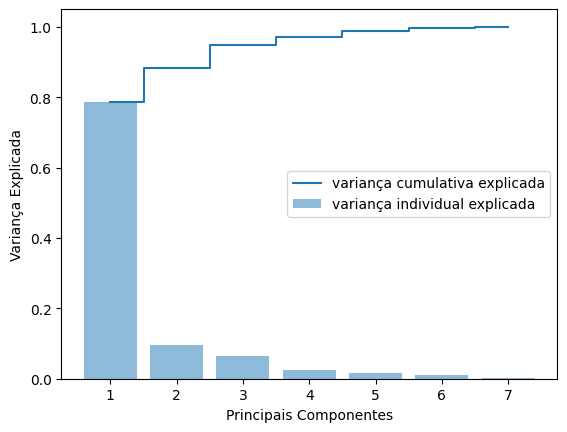

In [253]:
#Visualização da variança
plt.bar(range(1, len(var_explained) + 1), var_explained, alpha=0.5, align='center', label='variança individual explicada')
plt.step(range(1, len(cum_var_explained) + 1), cum_var_explained, where='mid', label='variança cumulativa explicada')
plt.ylabel('Variança Explicada')
plt.xlabel('Principais Componentes')
plt.legend(loc='best')
plt.show()

**Análise**
- Após analisarmos o gráfico de variança explicada, podemos definir o noss número de componentes ideal (ou mais ideal) como 6.

In [254]:
#Selecionando os componentes
num_componentes = 6

#Reduzindo a dimensionalidade
P_reduce = eigvectors_sorted[:num_componentes]  #matiz com os autovetores selecionados
X_std_reduced = np.dot(scaled_data, P_reduce.T) #transformação dos dados

#Convertendo os dados 
pca_columns = [f"PC{i + 1}" for i in range(num_componentes)]
pca_df = pd.DataFrame(data=X_std_reduced, columns=pca_columns)

Combinando os Dados

In [255]:
#Combinando com os dados originais do 
final_df = pd.concat([df, pca_df], axis=1)
final_df.head()


,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,...,highwaympg,price,company,model,PC1,PC2,PC3,PC4,PC5,PC6
0,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,...,27,13495.0,alfa-romero,giulia,0.070353,1.152224,0.128648,0.509339,0.121734,0.132106
1,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,...,27,16500.0,alfa-romero,stelvio,0.070353,1.152224,0.128648,0.509339,0.121734,0.132106
2,std,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,...,26,16500.0,alfa-romero,Quadrifoglio,1.366912,1.228706,-0.478876,0.074229,-0.147976,0.233765
3,std,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,...,30,13950.0,audi,100 ls,-0.111224,0.081508,0.495482,-0.279571,-0.166481,-0.319627
4,std,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,...,22,17450.0,audi,100ls,1.462274,0.760035,0.665499,0.123198,0.375451,0.126580


# **Modelling**

In [256]:
#Definindo meus dados finais 
df_final = final_df.copy()
df_final.head(10)

,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,...,highwaympg,price,company,model,PC1,PC2,PC3,PC4,PC5,PC6
0,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,...,27,13495.000,alfa-romero,giulia,0.070353,1.152224,0.128648,0.509339,0.121734,0.132106
1,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,...,27,16500.000,alfa-romero,stelvio,0.070353,1.152224,0.128648,0.509339,0.121734,0.132106
2,std,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,...,26,16500.000,alfa-romero,Quadrifoglio,1.366912,1.228706,-0.478876,0.074229,-0.147976,0.233765
3,std,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,...,30,13950.000,audi,100 ls,-0.111224,0.081508,0.495482,-0.279571,-0.166481,-0.319627
4,std,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,...,22,17450.000,audi,100ls,1.462274,0.760035,0.665499,0.123198,0.375451,0.126580
5,std,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,...,25,15250.000,audi,fox,0.945516,0.612681,0.548051,0.048749,0.245125,-0.395894
6,std,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,...,25,17710.000,audi,100ls,2.552331,-1.201900,1.041850,-1.179888,0.298273,-0.583460
7,std,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,...,25,18920.000,audi,5000,2.638306,-1.251886,1.033388,-1.135272,0.301234,-0.405496
8,turbo,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,...,20,23875.000,audi,4000,3.371004,-0.583504,1.126246,-1.317757,0.063543,-0.144255
9,turbo,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,...,22,17859.167,audi,5000s (diesel),2.437351,0.884992,0.368272,-0.694033,-0.179409,0.396832


In [257]:
#Verificando variáveis categóricas
df_final.select_dtypes(include=['object'])

,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,company,model
0,std,convertible,rwd,front,dohc,mpfi,alfa-romero,giulia
1,std,convertible,rwd,front,dohc,mpfi,alfa-romero,stelvio
2,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero,Quadrifoglio
3,std,sedan,fwd,front,ohc,mpfi,audi,100 ls
4,std,sedan,4wd,front,ohc,mpfi,audi,100ls
...,...,...,...,...,...,...,...,...
200,std,sedan,rwd,front,ohc,mpfi,volvo,145e (sw)
201,turbo,sedan,rwd,front,ohc,mpfi,volvo,144ea
202,std,sedan,rwd,front,ohcv,mpfi,volvo,244dl
203,turbo,sedan,rwd,front,ohc,idi,volvo,246


In [258]:
# Transformando variáveis categóricas
encoding= pd.get_dummies(data=df_final, columns=['model', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'fuelsystem','company','enginetype'],drop_first=True)
encoding.head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,horsepower,peakrpm,...,company_subaru,company_toyota,company_volkswagen,company_volvo,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,88.6,168.8,64.1,48.8,2548,4,130,3.47,111,5000,...,False,False,False,False,False,False,False,False,False,False
1,88.6,168.8,64.1,48.8,2548,4,130,3.47,111,5000,...,False,False,False,False,False,False,False,False,False,False


**Treino e teste**

In [259]:
#Definindo x e y
x = encoding.drop('price', axis=1) #variáveis explicativas
y = encoding['price']  #

#Train e test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2, random_state = 10)


In [260]:
#Dimensão x e y
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(164, 201)
(41, 201)
(164,)
(41,)


In [261]:
#Verificando se ficou como Df ou Array
print(type(x_train), type(y_train))
print(type(x_test), type(y_test))


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [263]:
#Modelos de regressão
lr  = LinearRegression()
rf = RandomForestRegressor(n_estimators=100)
tree = DecisionTreeRegressor()
ada = AdaBoostRegressor()
gbr = GradientBoostingRegressor()

In [269]:
#Lista p treino e teste dos modelos de regressão
regression_models = [lr,rf,tree,ada,gbr]
score_train = list()
score_test = list()

#Aplicando os algoritimos
for model in regression_models : 
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    score_train.append(model.score(x_train,y_train))
    score_test.append(model.score(x_test,y_test))

# Resultados

In [271]:
#Visualizando resultados dos algoritmos
models = ['Linear Regression','Random Forest Regressor','Gradient Boosting Regressor','Decision Tree Regressor','AdaBoostRegressor']

scores = pd.DataFrame([models,score_train,score_test])
scores

,0,1,2,3,4
0,Linear Regression,Random Forest Regressor,Gradient Boosting Regressor,Decision Tree Regressor,AdaBoostRegressor
1,0.995354,0.987841,1.0,0.965143,0.995879
2,0.809902,0.882219,0.930902,0.884151,0.89433


In [272]:
#Visualizando resultados dos algoritmos
scores = scores.transpose()
scores.columns = [ 'Model','Training Set Accuracy','Testing set Accuracy']
scores

,Model,Training Set Accuracy,Testing set Accuracy
0,Linear Regression,0.995354,0.809902
1,Random Forest Regressor,0.987841,0.882219
2,Gradient Boosting Regressor,1.0,0.930902
3,Decision Tree Regressor,0.965143,0.884151
4,AdaBoostRegressor,0.995879,0.89433


# **Insights e Conclusão**


### 1. **Análise do Overfitting**
- O **Gradient Boosting Regressor** apresentou **100% de precisão** no conjunto de treinamento, o que sugere **overfitting**. Embora o desempenho no teste (93%) seja o melhor entre todos, é importante investigar se o modelo está aprendendo ruídos específicos do conjunto de treino.
- O **Linear Regression** tem um gap significativo entre o treinamento (99.5%) e o teste (81%). Isso sugere que o modelo não generalizou bem.
- O **Decision Tree** apresenta um leve overfitting, pois o treinamento está em 96% e o teste em 88%.

### 2. **Melhores Desempenhos no Conjunto de Teste**
- **AdaBoost Regressor** (89.4%) e **Gradient Boosting Regressor** (93%) obtiveram os **melhores resultados** no conjunto de teste.


### 3. **Random Forest vs Decision Tree**
- O **Random Forest Regressor** (88.2%) superou o **Decision Tree Regressor** (88.4%) no teste, apesar de ter uma precisão de treino levemente menor.
- Isso reforça que **Random Forest**, por ser um conjunto de árvores, é menos propenso a overfitting em comparação a uma única **Decision Tree**.

### 4. **Linear Regression**
- O desempenho do **Linear Regression** no conjunto de teste (80.9%) é o **pior** entre os modelos.
- Isso pode indicar que a relação entre as variáveis não é totalmente linear, o que faz com que os modelos baseados em **ensemble learning** e **árvores de decisão** tenham melhor desempenho.

### **Conclusões**:
1. **Gradient Boosting Regressor** é o modelo com o melhor desempenho no teste (93%). Porém, é necessário ajustar os hiperparâmetros para reduzir o overfitting.
2. O **AdaBoost Regressor** também apresenta excelente desempenho com menos risco de overfitting.
3. **Random Forest** oferece um bom equilíbrio entre performance e risco de overfitting.
4. Recomenda-se **validação cruzada** e **regularização** adicional para ajustar o **Gradient Boosting** e avaliar seu desempenho real.
5. **Linear Regression** não é ideal para esse problema, e o uso de modelos não lineares deve ser priorizado.


